# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
import api_keys
import json
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
from api_keys import weather_api_key, g_key
import pandas as pd

# importing citipy to look up nearest coordinates to a soon to be created random list of coords.
from citipy import citipy
data_output = ('Output/city_weather_data.csv')

## Generate Cities List

In [2]:
cords = []
city_list = []


# Creating lists for coordinates, keeping separate to keep list of cities the same
lat = np.random.uniform(low=-90.000, high=90.000, size=2000)
lng = np.random.uniform(low=-180.000, high=180.000, size=2000)

#combines above numbers together in cords, creates a coordinate list
cords = zip(lat,lng)

# Finding nearest city with each lat/lng combo
for cord in cords:
    city = citipy.nearest_city(cord[0], cord[1]).city_name
    # Adds only unique cities to city_list
    if city not in city_list:
        city_list.append(city)
# Setting this for a progress bar later on
num_cities = len(city_list)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating lists to store api request info in
lat = []
lng = []
temp_high = []
temp_low = []
feels_like = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
city_id = []

#Creating base url
url = 'http://api.openweathermap.org/data/2.5/weather?'

#Setting units, change this to get different units
units = 'imperial'
# Query URL
cord_query_url = f"{url}&units={units}&appid={weather_api_key}&q="



# Getting data and appending to list, will run in a for loop
for count, place in enumerate(city_list, start=1):
    try:
        
        print(f'Working on getting data for {place}. This is city #: {count} of {num_cities}')
        weather_response = requests.get(cord_query_url + place).json()
        lat.append(weather_response["coord"]['lat'])
        lng.append(weather_response["coord"]["lon"])
        temp_high.append(weather_response["main"]["temp_max"])
        temp_low.append(weather_response["main"]["temp_min"])
        feels_like.append(weather_response["main"]["feels_like"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        city_id.append(weather_response["sys"]["id"])
    except(KeyError):
        print("City Not Found")
        print("---------------")
        
print("-------------------------------------------------------------------------------")
print(f'We were only able to find {len(city_name)} of {num_cities} cities')
print("-------------------------------------------------------------------------------")
print("Data Collection has completed")

Working on getting data for suntar. This is city #: 1 of 749
City Not Found
---------------
Working on getting data for saldanha. This is city #: 2 of 749
Working on getting data for zeerust. This is city #: 3 of 749
Working on getting data for butaritari. This is city #: 4 of 749
City Not Found
---------------
Working on getting data for stornoway. This is city #: 5 of 749
Working on getting data for port alfred. This is city #: 6 of 749
City Not Found
---------------
Working on getting data for hobart. This is city #: 7 of 749
Working on getting data for east london. This is city #: 8 of 749
Working on getting data for klaksvik. This is city #: 9 of 749
Working on getting data for port lincoln. This is city #: 10 of 749
City Not Found
---------------
Working on getting data for paamiut. This is city #: 11 of 749
City Not Found
---------------
Working on getting data for bada. This is city #: 12 of 749
City Not Found
---------------
Working on getting data for mataura. This is city #:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [8]:
# Creating DF with the above API Calls
weather_data = pd.DataFrame({"City": city_name,
                            "Country": country,
                            "Latitude": lat,
                            "Longitude": lng,
                            "Temperature High": temp_high,
                            "Temperature Low": temp_low,
                            "Feels Like Temp.": feels_like,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed
})
# Exports file to csv
weather_data.to_csv(data_output)
# Displays DF
weather_data.head(10)

,City,Country,Latitude,Longitude,Temperature High,Temperature Low,Feels Like Temp.,Humidity,Cloudiness,Wind Speed
0,Suntar,RU,62.1444,117.6319,59.99,59.99,60.21,96,100,1.50
1,Saldanha,ZA,-33.0117,17.9442,51.85,51.85,50.36,77,100,21.83
2,Zeerust,ZA,-25.5369,26.0751,32.81,32.81,32.81,52,0,0.31
3,Butaritari,KI,3.0707,172.7902,81.66,81.66,87.51,78,100,12.84
4,Stornoway,GB,58.2093,-6.3865,55.92,52.93,55.53,100,90,3.44
5,Port Alfred,ZA,-33.5906,26.8910,57.78,57.78,57.29,86,100,7.67
6,Hobart,AU,-42.8794,147.3294,49.01,43.27,47.84,64,75,1.99
7,East London,ZA,-33.0153,27.9116,56.34,56.34,55.81,88,0,5.75
8,Klaksvík,FO,62.2266,-6.5890,49.12,49.12,46.90,93,98,5.46
9,Port Lincoln,AU,-34.7333,135.8667,54.90,54.90,52.34,48,51,19.84


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
high_humidity = weather_data[weather_data["Humidity"] > 100]

print("No Cities in this list have humidity above 100%")
high_humidity.head(5)

No Cities in this list have humidity above 100%


,City,Country,Latitude,Longitude,Temperature High,Temperature Low,Feels Like Temp.,Humidity,Cloudiness,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

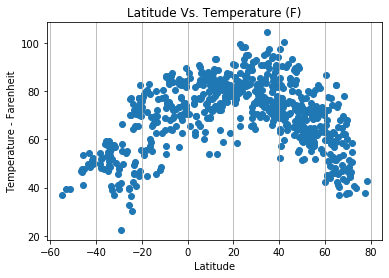

In [32]:
# Creating Scatter plot 
plt.scatter(lat,temp_high)
plt.xlabel("Latitude")
plt.ylabel("Temperature - Farenheit")
plt.grid(axis="x")
plt.title("Latitude Vs. Temperature (F)")
plt.savefig("Output/Latitudevstemp.jpg")

## Latitude vs. Humidity Plot

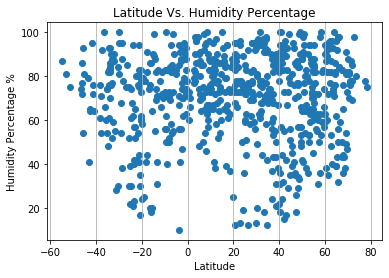

In [33]:
# Creating Scatter plot 
plt.scatter(lat,humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage %")
plt.grid(axis="x")
plt.title("Latitude Vs. Humidity Percentage")
plt.savefig("Output/Humidity.jpg")

## Latitude vs. Cloudiness Plot

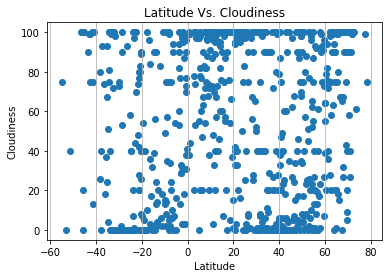

In [34]:
# Creating Scatter plot 
plt.scatter(lat,cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(axis="x")
plt.title("Latitude Vs. Cloudiness")
plt.savefig("Output/Latitudevscloudiness.jpg")

## Latitude vs. Wind Speed Plot

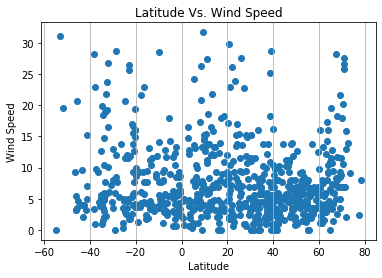

In [35]:
# Creating Scatter plot 
plt.scatter(lat,wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(axis="x")
plt.title("Latitude Vs. Wind Speed")
plt.savefig("Output/Latitudevswindspeed.jpg")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [7]:
# Creating DF's for northern and southern hemispheres
northern_hemisphere = weather_data[weather_data["Latitude"] >= 0] 
southern_hemisphere = weather_data[weather_data["Latitude"] < 0] 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression